# I. Lý thuyết

1) Tại sao các mô hình deep learning lại chiếm ưu thế hơn so với các mô hình machine learning truyền thống đối với dữ liệu lớn ?

A. Do mô hình deep learning có thể được thiết kế với kích thước tùy ý nên có khả năng xấp xỉ mọi hàm số. Do đó nó có khả năng biểu diễn tốt và hoạt động hiệu quả trên dữ liệu lớn.

B. Các mô hình machine learning thường bị overfitting đối với dữ liệu lớn 

C. Các mô hình deep learning có chi phí huấn luyện tốn kém hơn so với machine learning.

D. Do kiến trúc của mô hình Machine Learning bao gồm nhiều layers xếp chồng.

=> Đáp án A

2) Ý nghĩa của hàm loss function trong mạng neural network là gì ?

A. Là hàm số đánh giá độ chính xác của mô hình.

B. Mục tiêu của quá trình huấn luyện là tối thiểu hóa hàm loss function bằng thuật toán gradient descent. Giá trị của hàm số này giúp đo lường mức độ khớp của dự báo từ mô hình trên dữ liệu huấn luyện.

C. Khi loss function giảm thì luôn đảm bảo độ chính xác của mô hình tăng.

D. Là hàm số cần tối đa hóa trong quá trình huấn luyện.

=> Đáp án B

3) Khi huấn luyện trên các bộ dữ liệu bigdata thì chúng ta nên sử dụng phương pháp nào ?

A) Sử dụng gradient descent trên toàn bộ dữ liệu.

B) Sử dụng stochastic gradient descent trên từng điểm dữ liệu.

C) Mini-batch gradient descent huấn luyện mô hình trên từng tập dữ liệu con có kích thước nhỏ hơn memory CPU/GPU.

D) Có thể sử dụng stochastic gradient descent hoặc mini-batch gradient descent.

=> Đáp án C

4) Quá trình feed forward và backpropagation thực hiện những gì ?

A) feed forward tính toán output và loss function, backpropagation tính đạo hàm trên từng layer và cập nhật trọng số.

B) feed forward cập nhật trọng số cho mô hình, backpropagation tính toán output và loss function.

C) feed forward tính ra output của mô hình, backpropagation tính toán loss function

D) feed forward được thực hiện sau backpropagation.

=> Đáp án A

5) Tác dụng của batch normalization là gì ?

A) Loại bỏ một tỷ lệ ngẫu nhiên số lượng units tại mỗi layer để tạo thành nhiều kiến trúc kết hợp ngẫu nhiên.

B) Tìm ra các tham số phân phối là trung bình và phương sai trên từng mini-batch.

C) Đồng nhất phân phối xác suất của $z^{[l]}$ trên mỗi layer $l$.

D) Giảm thiểu ảnh hưởng của input distribution shift nhằm giúp huấn luyện loss function nhanh và ổn định hơn.

=> Đáp án D


# II. Thực hành

Xuất phát từ mô hình tốt nhất của bạn xây dựng được đối với bài toán phân loại income classification tại bài trước. Bạn hãy thực hiện một số thử nghiệm sau:

6) Thay đổi hàm loss function, batch size và optimizer.

7) Thử nghiệm thêm các layers mà bạn đã học được trong bài này vào kiến trúc của mình.

8) Thay đổi các khởi tạo trọng số theo các phân phối khác nhau và đánh giá độ chính xác của kết quả huấn luyện.

9) Thiết lập không gian search và tự động hóa tìm kiếm kiến trúc tốt nhất trên optuna.

10) Deploy model sử dụng flask ap. Tham khảo [Flaskapp tutorial](https://drive.google.com/file/d/1AZNtzrmnhJ-OBgijWoaAqXbPhJ6xL0Po/view?usp=sharing).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/lesson 2/train.csv").dropna()
df.sample(10)

,ID,age,work_type,final_weight,education,total_education_yrs,marital_state,job,status,ethnicity,sex,capital_gain,capital_loss,hrs_per_week,nationality,target_income
17864,17864,50,Self-emp-inc,120781,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,M,0,0,60,South,1
24946,24946,47,Private,139145,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,F,0,0,60,US,0
13804,13804,36,Private,183081,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,M,0,0,40,US,0
3126,3126,61,Self-emp-inc,66614,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,M,0,0,40,US,0
16927,16927,33,Private,403552,HS-grad,9,Never-married,Other-service,Not-in-family,Black,M,0,0,32,US,0
3686,3686,32,?,285131,Assoc-acdm,12,Never-married,?,Unmarried,White,M,0,0,20,US,0
18271,18271,60,Private,198170,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,M,0,0,45,US,1
13550,13550,52,Self-emp-not-inc,135716,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,M,0,0,70,US,0
5069,5069,20,Private,56322,Some-college,10,Never-married,Other-service,Own-child,White,M,0,0,20,US,0
10071,10071,67,?,183374,HS-grad,9,Widowed,?,Not-in-family,White,F,2329,0,15,US,0


In [ ]:
df = df.drop("ID", axis = 1)
df.describe()

,age,final_weight,total_education_yrs,capital_gain,capital_loss,hrs_per_week,target_income
count,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,38.568800,1.900156e+05,10.079160,1051.950240,86.053160,40.392200,0.23944
std,13.642694,1.059694e+05,2.566125,7228.975017,400.535454,12.350547,0.42675
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.00000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.00000
50%,37.000000,1.786440e+05,10.000000,0.000000,0.000000,40.000000,0.00000
75%,48.000000,2.368040e+05,12.000000,0.000000,0.000000,45.000000,0.00000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.00000


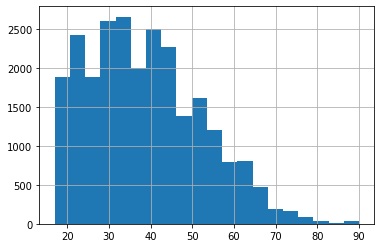

In [ ]:
# Observe the outliers by histogram 
df['age'].hist(bins=20)

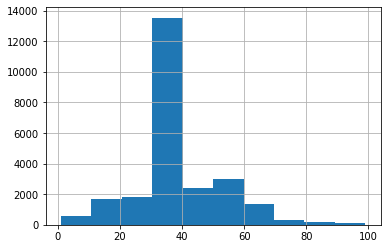

In [ ]:
df['hrs_per_week'].hist(bins=10)

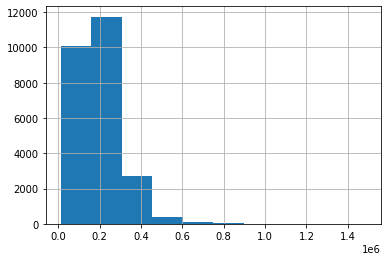

In [ ]:
df['final_weight'].hist()

In [ ]:
# Remove outliers from dataframe
df = df[df['age']<65]
df = df[df['hrs_per_week']>12]
df = df[df['hrs_per_week']<65]
df = df[df['final_weight']<420000]

In [ ]:
df.shape

(21998, 15)

In [ ]:
import numpy as np
import random
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
def seed_all(seed):
    np.random.seed(seed)
    random.seed(seed)
seed = 42 
seed_all(seed)

In [ ]:
#metric
def get_metrics(y_test, y_pred):
    print('ACCURACY_SCORE: ', round(accuracy_score(y_test, y_pred), 4))
    print('F1_SCORE: ', round(f1_score(y_test, y_pred, average='macro'), 4))
    print('CONFUSION_MATRIX:\n', confusion_matrix(y_test, y_pred),'\n')
    print(classification_report(y_test, y_pred, digits=4), '\n')

In [ ]:
# one hot encoder the dataset
label = df.pop('target_income').values
df = pd.get_dummies(df)

In [ ]:
from sklearn.model_selection import train_test_split
features = df.columns.tolist()
x_train, x_test, y_train, y_test = train_test_split(df[features].values, label, test_size = 0.2, 
                                                    stratify = label, # assign equal proportion of target label in train/test 
                                                    random_state = 0) # keep train/test split the same if run again. 
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))


Training Set: 17598, Test Set: 4400 



In [ ]:
# Rescaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))

Training Set: 17598, Test Set: 4400 



# Optuna Neural Architecture Search

[Auto-Tuning Hyperparameters with Optuna and PyTorch
](https://www.youtube.com/watch?v=P6NwZVl8ttc) is a good tutorial about search architecture.

In the below, we are going to use optuna to search architecture of model that include:

* Number of layers
* Number of hidden units of each layers
* the optimizer that applies to create the architecture.
* learning rate

In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 81 kB 8.9 MB/s 
     |████████████████████████████████| 210 kB 46.9 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 113 kB 48.9 MB/s 
     |████████████████████████████████| 149 kB 46.9 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=f9ccb7e6e3ad150bb95fe4c05795543e3df026e11174b10edeb46dea9efe7d33
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna
from optuna.trial import TrialState # => tracking lại các lượt search từ model 
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability => gieo hat de tai tao ket qua chay cho nhung luot tiep theo
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.10.0+cu111


In [ ]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
# Reshape y target into [-1, 1] to fit with Binary Cross Entropy
train_y = torch.Tensor(y_train).view(-1, 1).float()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=16,
    shuffle=True, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).view(-1, 1).float()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=16,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [ ]:
train_y

tensor([[0.],
        [1.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

Define trial for model in which we define network architecture in random way. That architecture will be trained in the next step.

In [ ]:
def define_model(trial):
    # We optimize the number of layers, hidden units and dropout ratio in each layer.
    n_layers = trial.suggest_int("n_layers", 2, 6)
    layers = []

    in_features = len(features)
    for i in range(n_layers):
        out_features = trial.suggest_int("n_units_l{}".format(i), 4, 128)
        layers.append(nn.Linear(in_features, out_features))
        layers.append(nn.ReLU())
        p = trial.suggest_float("dropout_l{}".format(i), 0.2, 0.5)
        layers.append(nn.Dropout(p))

        in_features = out_features
    layers.append(nn.Linear(in_features, 1))
    layers.append(nn.Sigmoid())

    return nn.Sequential(*layers)

Objective function to train and evaluate the model. Finally, we select the best model corresponding with highest accuracy on evaluation.

In [ ]:
DEVICE = torch.device("cpu")
BATCHSIZE = 16
EPOCHS = 30
LOG_INTERVAL = 10
N_TRAIN_EXAMPLES = BATCHSIZE * 300
N_VALID_EXAMPLES = BATCHSIZE * 100

def objective(trial):

    # Generate the model.
    model = define_model(trial).to(DEVICE)

    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    loss_criteria = nn.BCELoss()
    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)

            optimizer.zero_grad()
            output = model(data)
            # loss = F.nll_loss(output, target)
            loss = loss_criteria(output, target)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(test_loader):
                # Limiting validation data.
                if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                    break
                data, target = data.view(data.size(0), -1).to(DEVICE), target.to(DEVICE)
                output = model(data)
                # Get the index of the max log-probability.
                pred = torch.tensor(output.data>=0.5).float()
                correct += pred.eq(target.view_as(pred)).sum().item()

        accuracy = correct / min(len(test_loader.dataset), N_VALID_EXAMPLES)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize") # => tìm ra objective func có accuracy lớn nhất trên test data
study.optimize(objective, n_trials=100, timeout=600) # => optimize dựa trên 100 trials trong 600s

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-19 03:56:31,147] A new study created in memory with name: no-name-64e44eff-a2d6-4c2f-8c92-ba4137f2f0ae
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[I 2022-02-19 03:57:17,698] Trial 0 finished with value: 0.838125 and parameters: {'n_layers': 2, 'n_units_l0': 21, 'dropout_l0': 0.49419798784219243, 'n_units_l1': 31, 'dropout_l1': 0.2602538732668534, 'optimizer': 'RMSprop', 'lr': 4.821171564918944e-05}. Best is trial 0 with value: 0.838125.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
[I 2022-02-19 03:57:59,977] Trial 1 finished with value: 0.843125 and

Study statistics: 
  Number of finished trials:  32
  Number of pruned trials:  20
  Number of complete trials:  12
Best trial:
  Value:  0.8475
  Params: 
    n_layers: 3
    n_units_l0: 75
    dropout_l0: 0.3697812862189006
    n_units_l1: 92
    dropout_l1: 0.31250329747340094
    n_units_l2: 125
    dropout_l2: 0.4258317133105567
    optimizer: Adam
    lr: 0.00035952867884704907


## Train model

In that step, we retrain the model with the best architecture.

In [ ]:
model = define_model(trial)

Define the loss function and optimizer that suits with hyperparameter search result. 

In [ ]:
loss_criteria = nn.BCELoss()

optimizer = torch.optim.RMSprop(model.parameters(), lr=trial.params['lr'])
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 30 epochs
epochs = 30

## Evaluate model

Finally, we train the best model in train dataset and evaluate in test dataset.

In [ ]:
def train(model, data_loader, optimizer):
    '''
    Train model through data loader and optimizer
    Args:
      model: model to train
      data_loader: data loader to manage batch loading
      optimizer: control update gradient descent
    '''
    # enable train mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        # reset optimizer into zero
        optimizer.zero_grad()
        # feed forward to compute output and loss
        out = model(data)
        loss = loss_criteria(out, target)
        # accumulate loss
        train_loss += loss.item()
        # compute gradient descent
        loss.backward()
        # update into weight
        optimizer.step()

    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

def test(model, data_loader):
    '''
    evaluate model accuracy and loss on test
    Args: 
      model: model trained
      data_loader: load the dataset
    '''
    # Turn on evaluation mode
    model.eval()
    test_loss = 0
    correct = 0
    # Constrain operation inside torch.no_grad() to restrict the gradient compute and update weight 
    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()
            # Calculate the accuracy
            predicted = torch.tensor(out.data[1]>=0.5).float()
            correct += torch.sum(target==predicted).item()
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print(correct,' : ', len(data_loader.dataset))
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

In [ ]:
# training through epoch
for epoch in range(1, epochs + 1):
    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 0.368973


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


2926  :  4400
Validation set: Average loss: 0.329654, Accuracy: 2926/4400 (66%)

Epoch: 2
Training set: Average loss: 0.333589
2908  :  4400
Validation set: Average loss: 0.325401, Accuracy: 2908/4400 (66%)

Epoch: 3
Training set: Average loss: 0.321076
2950  :  4400
Validation set: Average loss: 0.322870, Accuracy: 2950/4400 (67%)

Epoch: 4
Training set: Average loss: 0.317430
2940  :  4400
Validation set: Average loss: 0.322471, Accuracy: 2940/4400 (67%)

Epoch: 5
Training set: Average loss: 0.313620
2946  :  4400
Validation set: Average loss: 0.324390, Accuracy: 2946/4400 (67%)

Epoch: 6
Training set: Average loss: 0.312862
2940  :  4400
Validation set: Average loss: 0.319950, Accuracy: 2940/4400 (67%)

Epoch: 7
Training set: Average loss: 0.310839
2940  :  4400
Validation set: Average loss: 0.321530, Accuracy: 2940/4400 (67%)

Epoch: 8
Training set: Average loss: 0.306397
2946  :  4400
Validation set: Average loss: 0.322132, Accuracy: 2946/4400 (67%)

Epoch: 9
Training set: Average

Evaluation on test dataset
ACCURACY_SCORE:  0.8518
F1_SCORE:  0.7827
CONFUSION_MATRIX:
 [[3115  225]
 [ 427  633]] 

              precision    recall  f1-score   support

           0     0.8794    0.9326    0.9053      3340
           1     0.7378    0.5972    0.6601      1060

    accuracy                         0.8518      4400
   macro avg     0.8086    0.7649    0.7827      4400
weighted avg     0.8453    0.8518    0.8462      4400
 



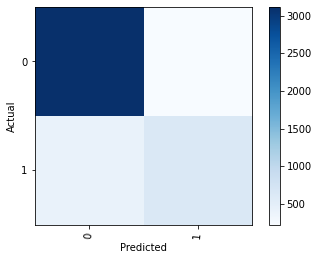

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def _evaluate(model, x_test):
  model.eval()
  x = torch.Tensor(x_test).float()
  predictions = [1 if i>0.5 else 0 for i in model(x).data]
  predictions = torch.tensor(predictions)
  print('Evaluation on test dataset')
  get_metrics(y_test, predictions)

  # Plot the confusion matrix
  classes=['0','1']
  cm = confusion_matrix(y_test, predictions.numpy())
  plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
  plt.colorbar()
  tick_marks = np.arange(2)
  plt.xticks(tick_marks, classes, rotation=85)
  plt.yticks(tick_marks, classes)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()
_evaluate(model, x_test)

In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import pickle
def _save_pkl(path, obj):
  with open(path, 'wb') as f:
    pickle.dump(obj, f)

def _load_pkl(path):
  with open(path, 'rb') as f:
    obj = pickle.load(f)
  return obj

In [ ]:
_save_pkl('IncomeClassifier',model)

In [ ]:
_save_pkl("IncomeScaler",scaler)

# 10. Flask Deployment

In [ ]:
# Encoding numpy to json
import json
class NumpyEncoder(json.JSONEncoder):
    '''
    Encoding numpy into json
    '''
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.int32):
            return int(obj)
        if isinstance(obj, np.int64):
            return int(obj)
        if isinstance(obj, np.float32):
            return float(obj)
        if isinstance(obj, np.float64):
            return float(obj)
        return json.JSONEncoder.default(self, obj)

In [ ]:
from PIL import Image
import numpy as np
from flask import Flask, request
import flask
import json

# Khởi tạo model.
global model 
model = None
# Khởi tạo flask app
app = Flask(__name__)

# Khai báo các route 1 cho API
@app.route("/", methods=["GET"])
# Khai báo hàm xử lý dữ liệu.
def _hello_world():
  return "Hello world"

if __name__ == "__main__":
  print("App run!")
  app.run()

App run!
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


# chưa thấy câu 6,7,8 thay đổi loss,optim,khởi tạo trọng số, thêm bớt layer